In [27]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

NameError: name 'data' is not defined

In [28]:
#import dataset 
data=pd.read_csv('Life Expectancy Data.csv')
data.head(10)
number_of_rows=data.shape[0]
number_of_columns=data.shape[1]
data_types = data.dtypes
missing_values = data.isnull().sum().sum()
descriptive_statistics = data.describe()
basic_structure = {
    "Number of rows": number_of_rows,
    "Number of columns":number_of_columns,
    "Data Types": data_types,
    "Total Missing Values": missing_values,
    "Descriptive Statistics":descriptive_statistics
}
basic_structure

{'Number of rows': 2938,
 'Number of columns': 22,
 'Data Types': Country                             object
 Year                                 int64
 Status                              object
 Life expectancy                    float64
 Adult Mortality                    float64
 infant deaths                        int64
 Alcohol                            float64
 percentage expenditure             float64
 Hepatitis B                        float64
 Measles                              int64
  BMI                               float64
 under-five deaths                    int64
 Polio                              float64
 Total expenditure                  float64
 Diphtheria                         float64
  HIV/AIDS                          float64
 GDP                                float64
 Population                         float64
  thinness  1-19 years              float64
  thinness 5-9 years                float64
 Income composition of resources    float64
 Schooling 

In [29]:
missingvalues = data.isnull().sum()
missingvalues

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [30]:
#find duplicates: các dữ liệu bị trùng lặp 
data.duplicated().sum()



0

In [20]:
#identifiying garbage values (xác định dữ liệu không nhất quán, tức là
#được ghi nhận khác nhau cho cùng một đối tượng, thực thể)
for i in data.columns:
    print(data[i].value_counts())
    

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
Status
Developing    2426
Developed      512
Name: count, dtype: int64
Life expectancy 
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: count, Length: 362, dtype: int64
Adult Mortality
12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
         ..
666.0     1
675.0     1
654.0     1
633.0     1
665.0     1
Name: count, Length: 425, 

In [32]:
import matplotlib.pyplot as plt 

numerical_columns = data.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(16, 17))  # kích thước của figure

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  
    data.boxplot(col)
    plt.title(col)

plt.tight_layout()
plt.show()


ValueError: num must be an integer with 1 <= num <= 16, not 17

ValueError: num must be an integer with 1 <= num <= 16, not 17

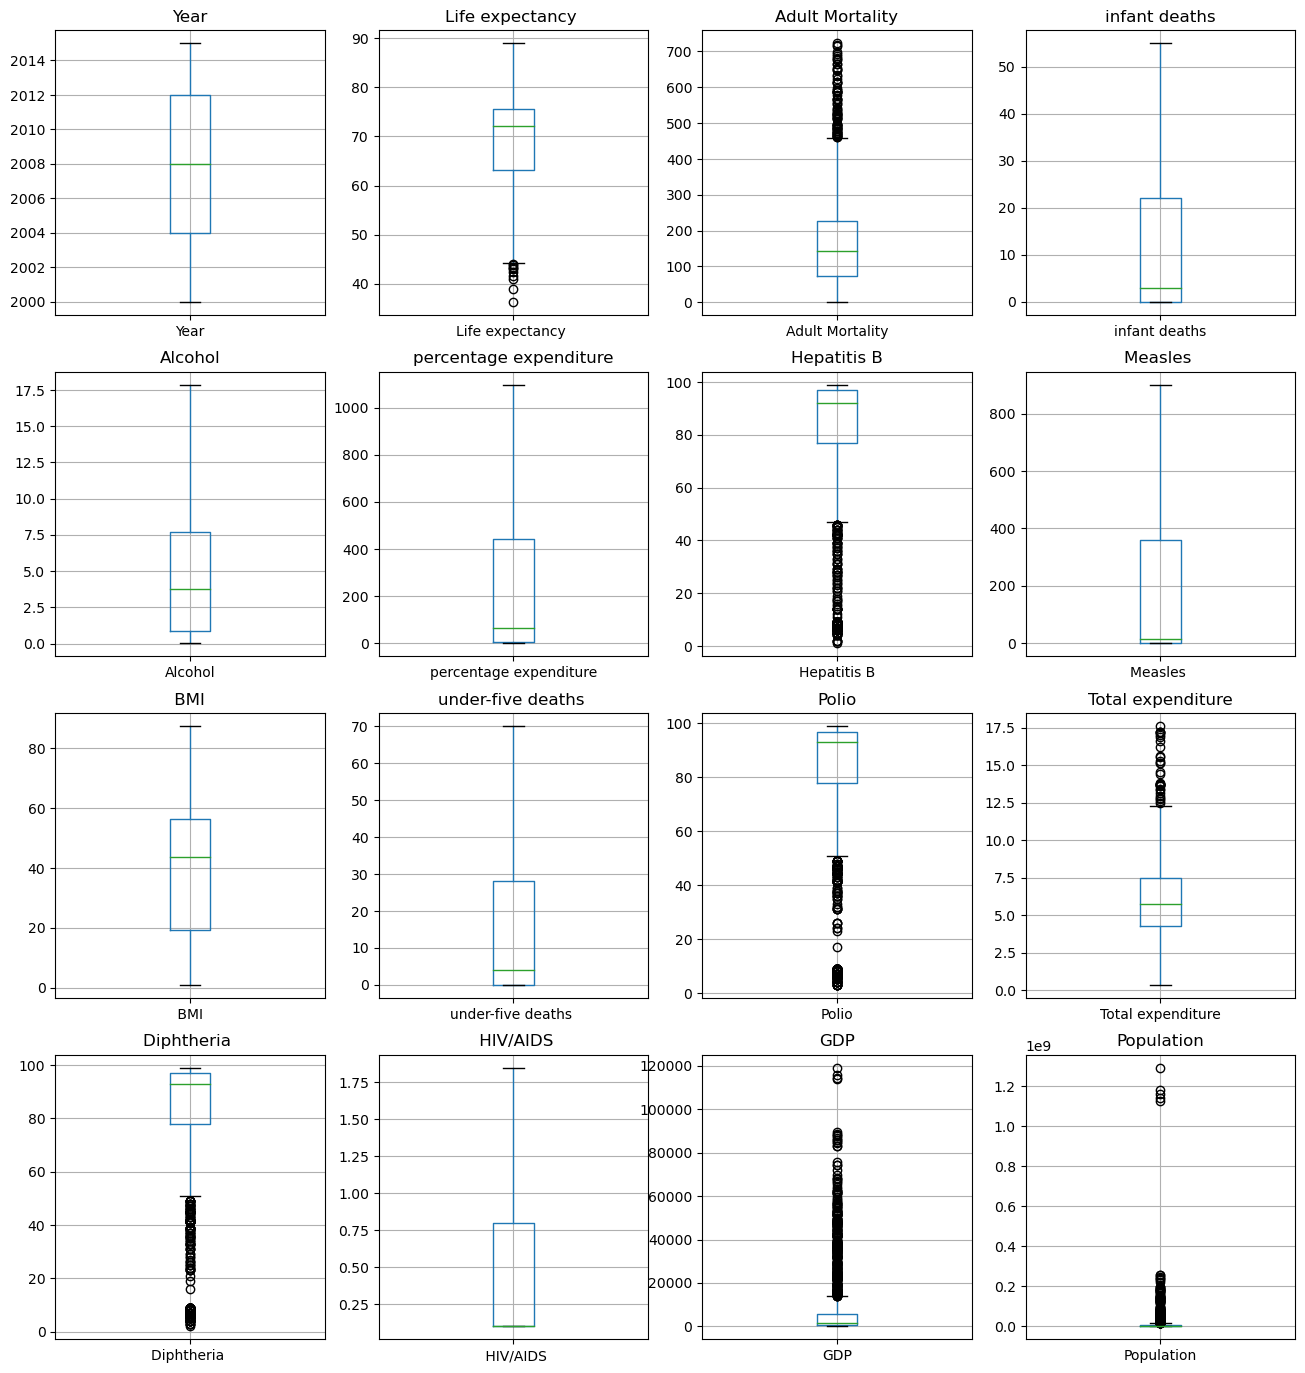

In [40]:
import matplotlib.pyplot as plt 

numerical_columns = data.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(16, 17))  # kích thước của figure

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  
    data.boxplot(col)
    plt.title(col)

plt.tight_layout()
plt.show()

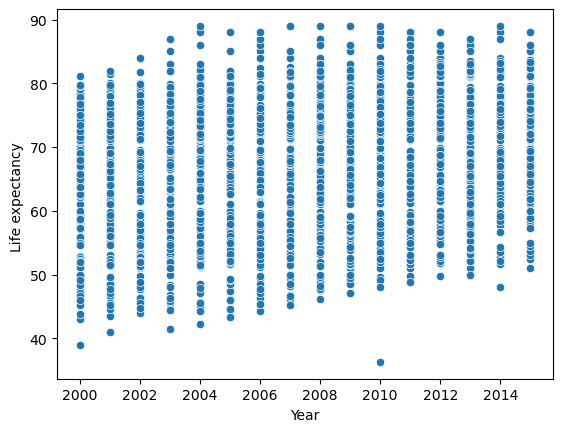

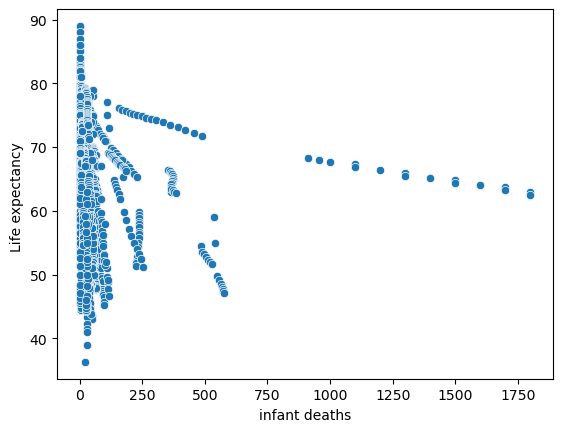

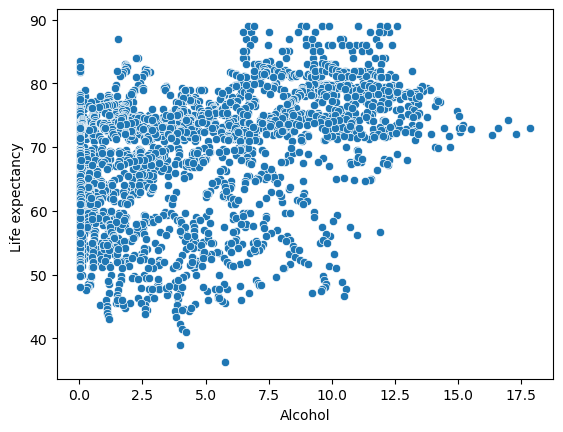

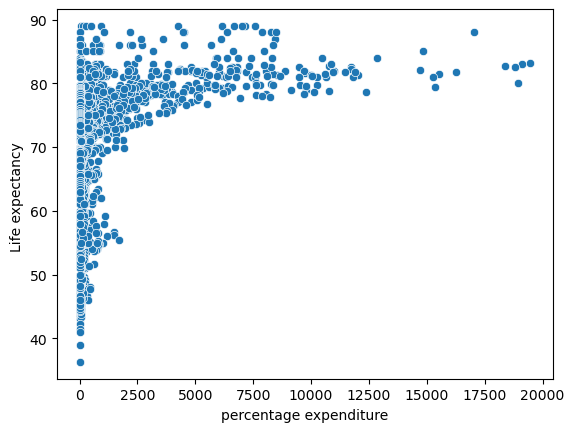

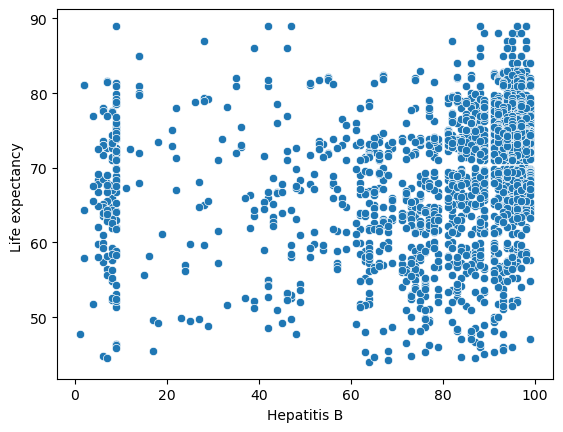

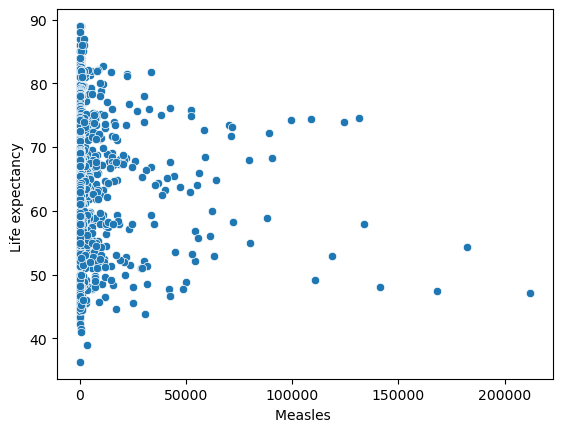

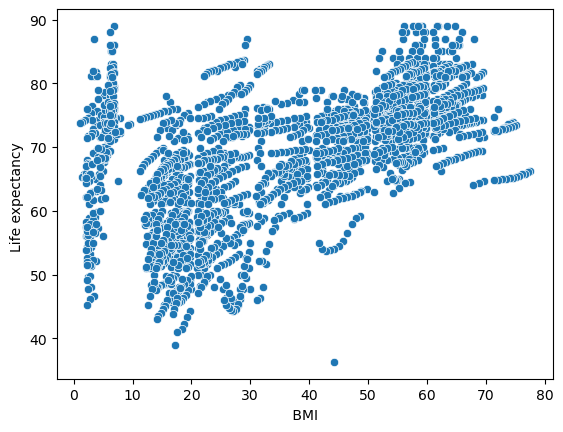

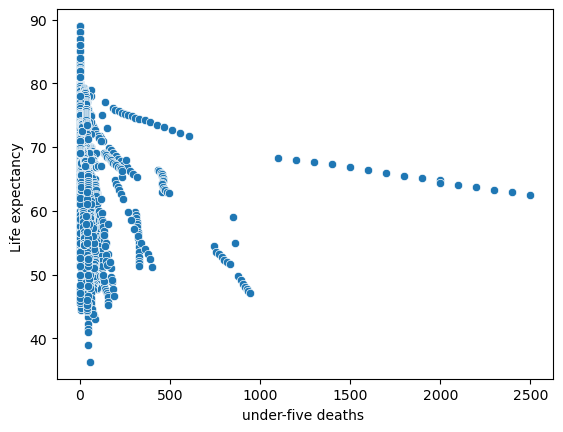

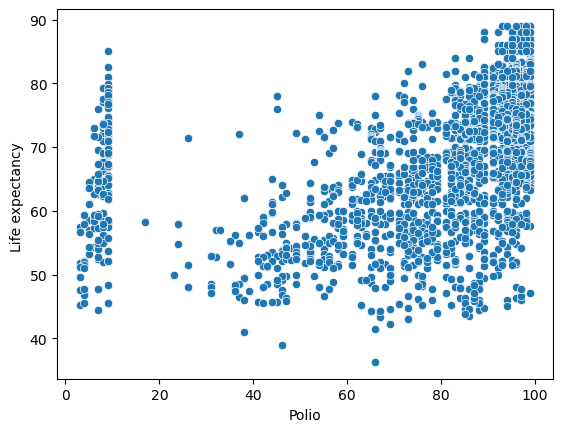

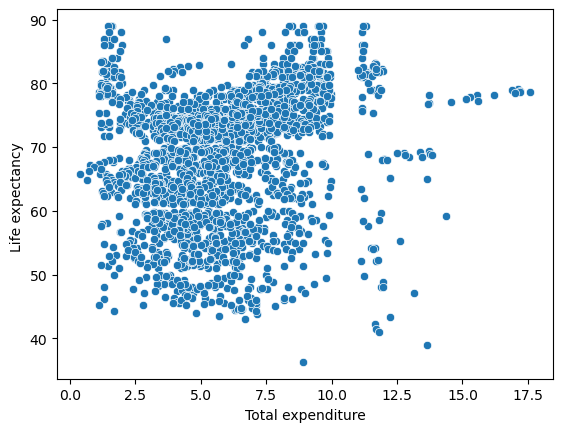

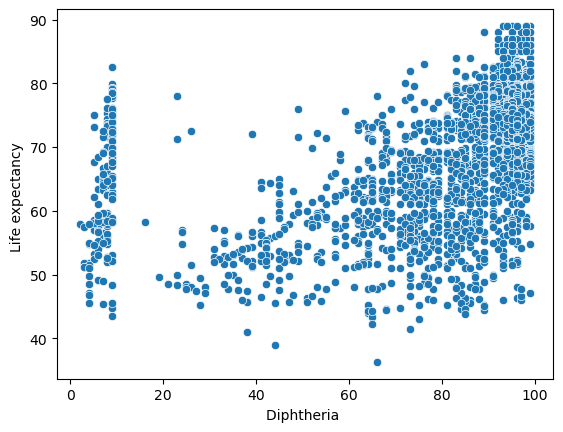

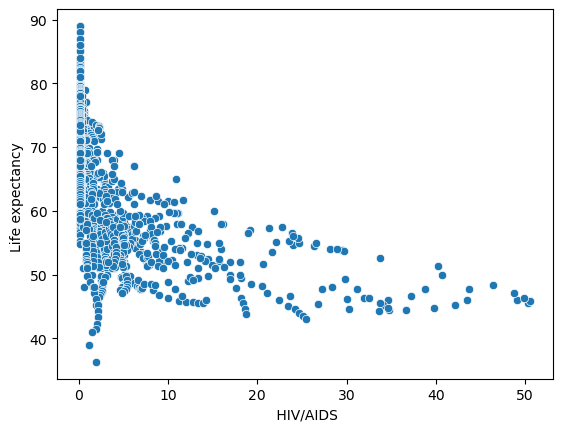

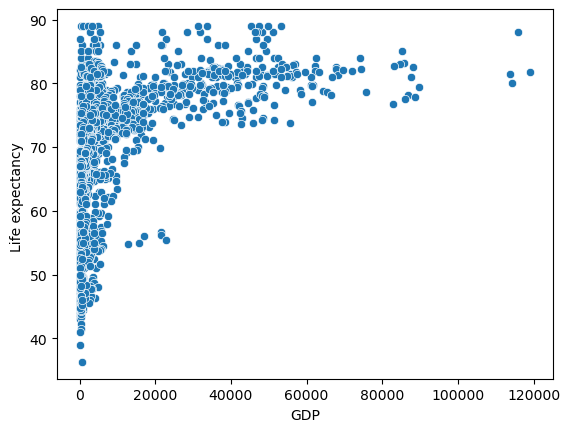

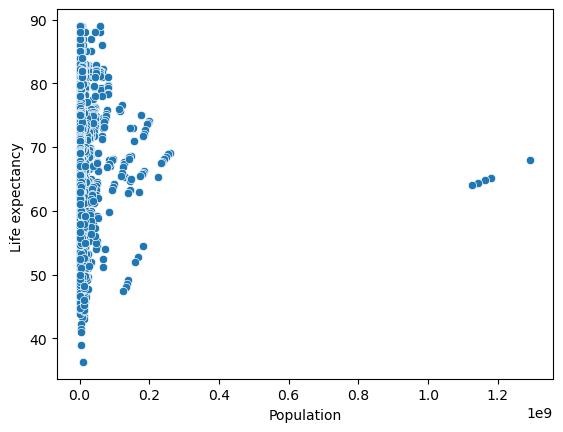

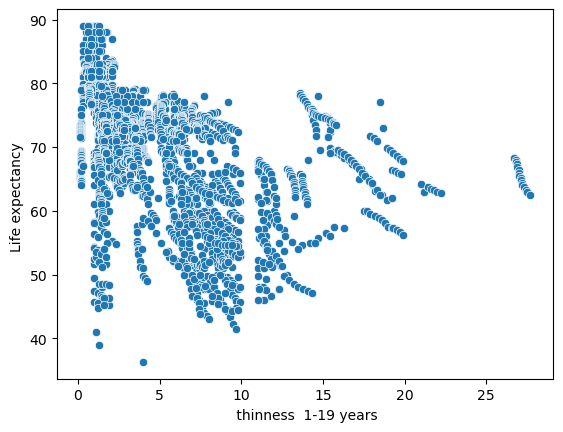

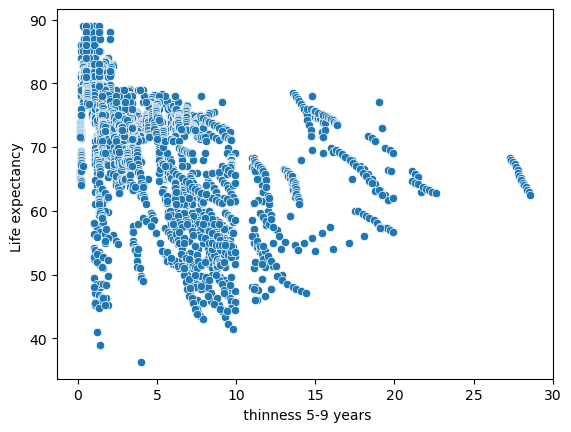

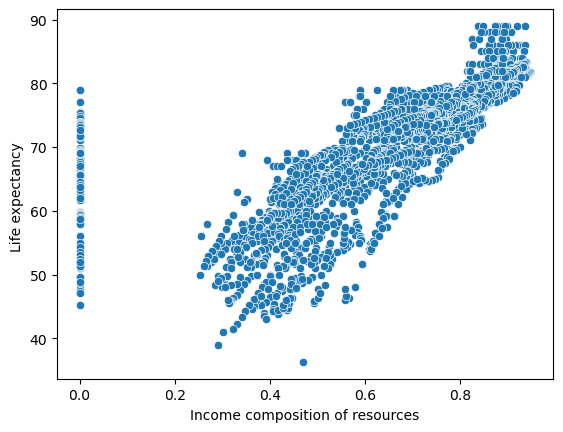

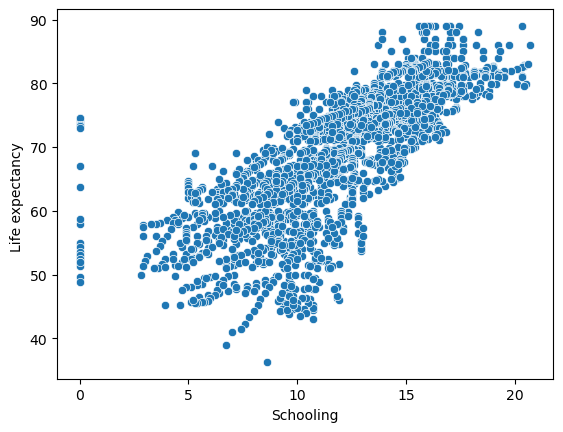

In [31]:
#xem xét có nên xử lý, loại bỏ nhiễu (tức là bỏ đi outliers hay không)
#1.vẽ ra biểu đồ phân tán. yếu tố tuổi thọ sẽ được quyết định, bị ảnh hưởng bởi các yếu tố thuộc tính xung quanh
#kiểm tra mối quan hệ, nếu sau khi bỏ outliers, mối quan hệ tốt hơn thì bỏ, còn ko thì giữ lại.
#scatter plot to understand the relationship 
for i in ['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']:
    sns.scatterplot(data=data,x=i,y='Life expectancy ')
    plt.show()
#vì biến tuổi thọ là biến mục tiêu. 

In [28]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [41]:
#xử lý giữ liệu bị thiếu.
missing_values = data.isnull().sum()
missing_values
for i in data.select_dtypes(include=['float64','int64']).columns:
    data[i].fillna(data[i].median(),inplace=True)

    #kiem tra lai:
missing_values = data.isnull().sum()
missing_values
#2 giải thích này hợp lý nhất cho việc sử dụng KNNImputer để xử lý dữ liệu bị thiếu: 
#Giữ lại cấu trúc không gian dữ liệu: KNNImputer dựa vào thông tin từ các hàng dữ liệu tương đồng nhất (k-nearest neighbors) để dự đoán giá trị cho các ô dữ liệu bị thiếu. Do đó, nó giữ lại cấu trúc không gian dữ liệu ban đầu một cách tương đối.
#Hiệu quả với dữ liệu số lượng lớn: KNNImputer hoạt động tốt với các bộ dữ liệu có kích thước lớn, không gian chiều cao hoặc chiều rộng lớn, và không cần phải lặp lại việc huấn luyện mô hình cho từng cột riêng biệt.

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

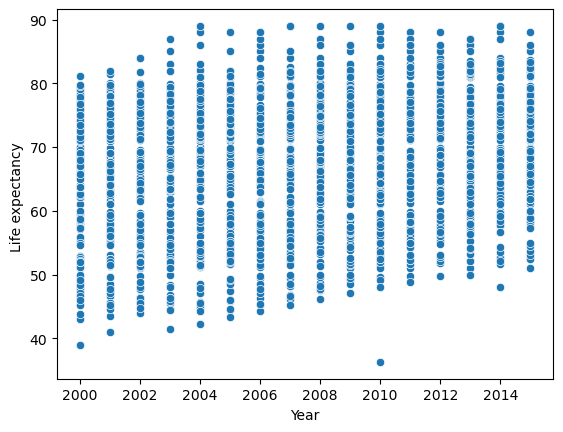

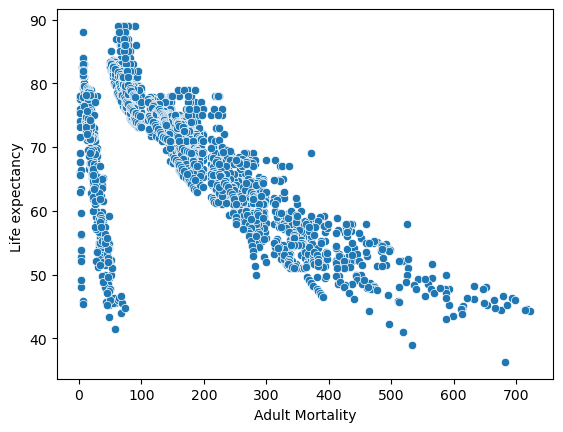

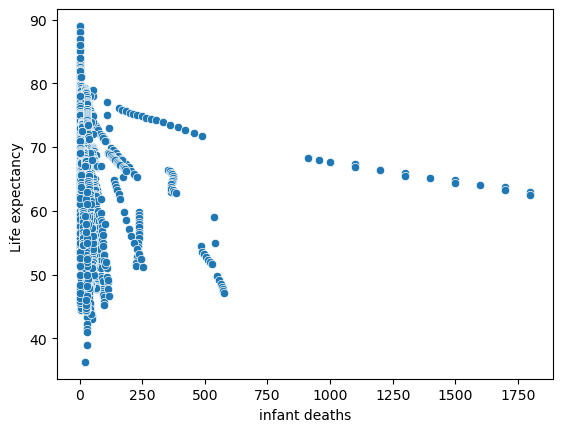

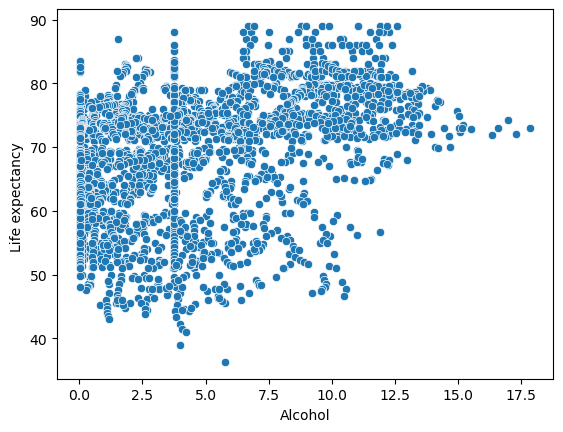

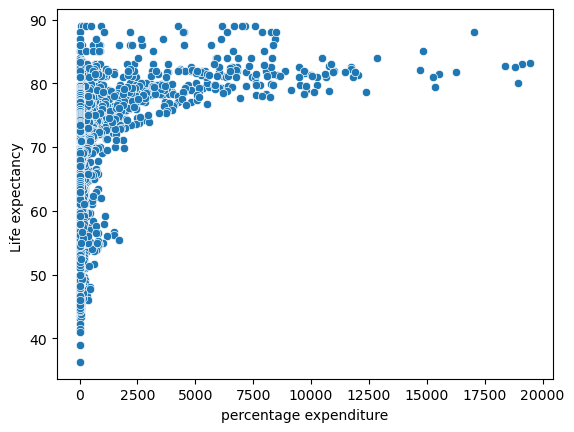

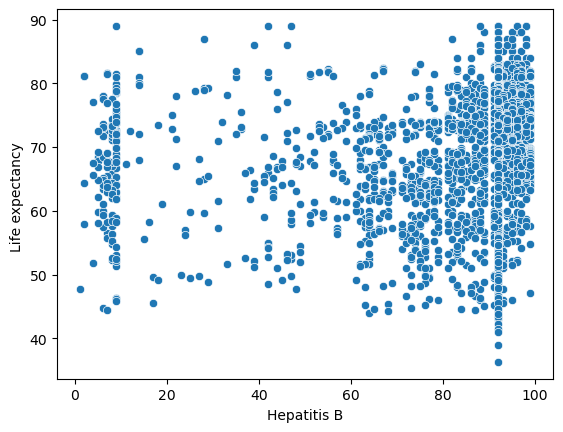

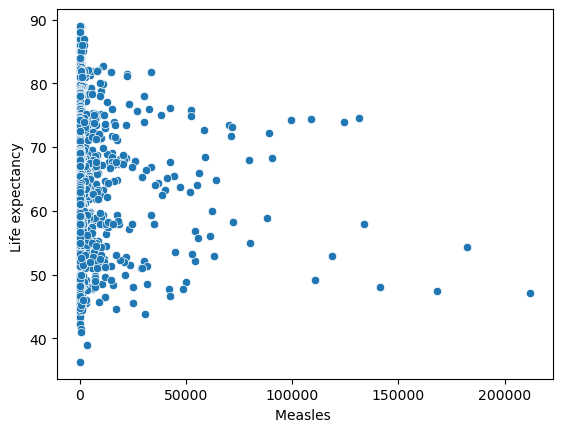

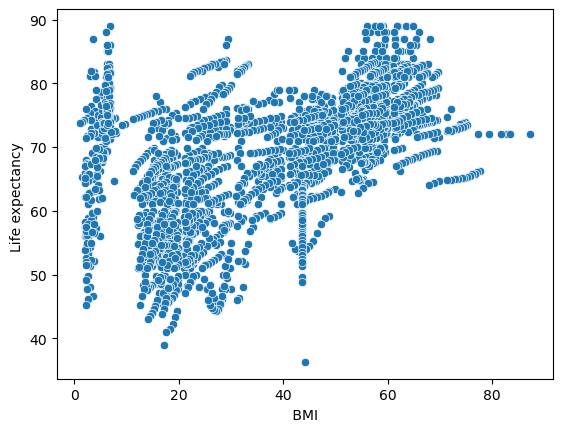

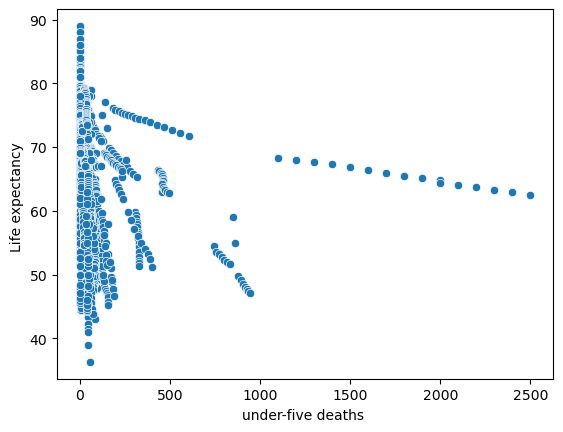

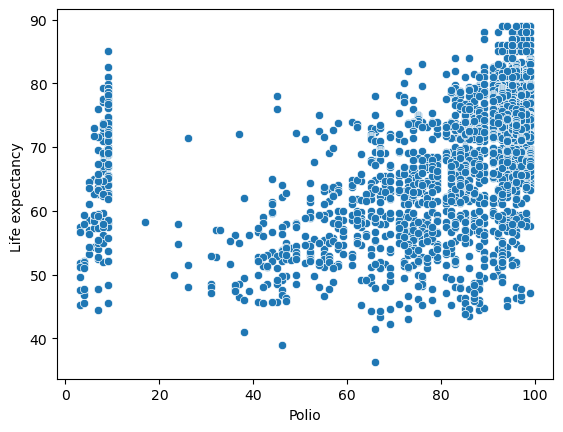

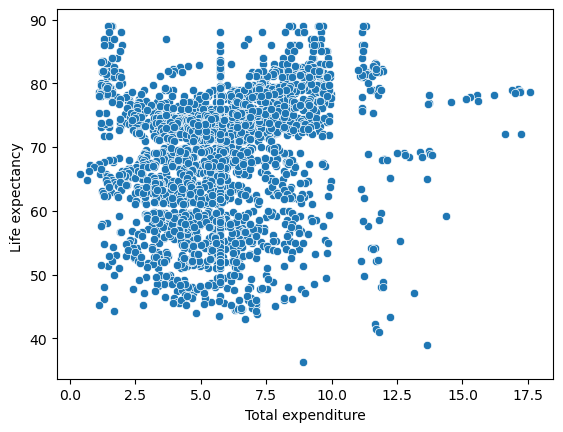

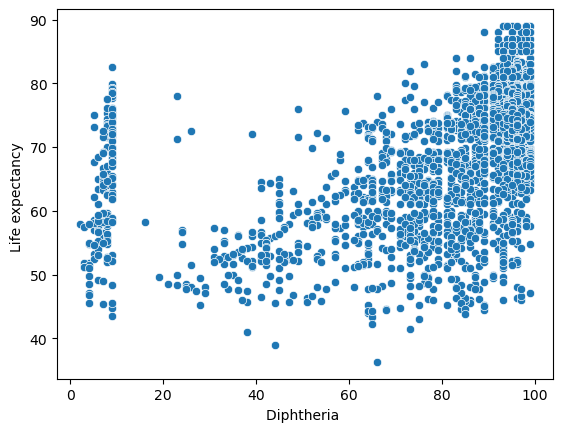

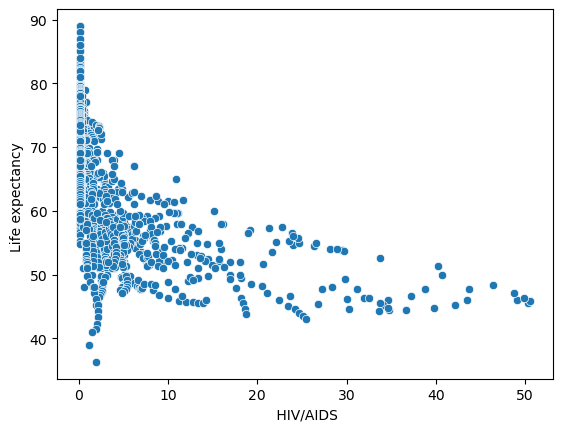

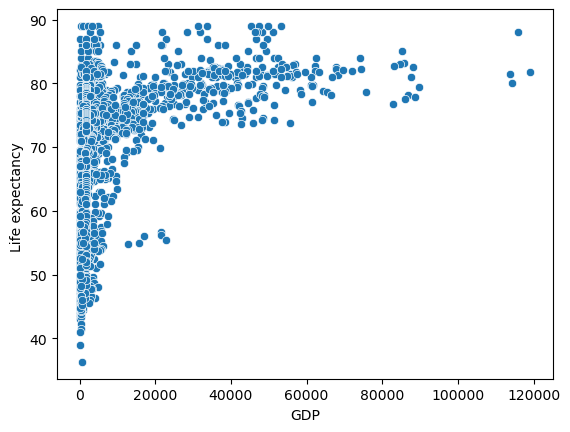

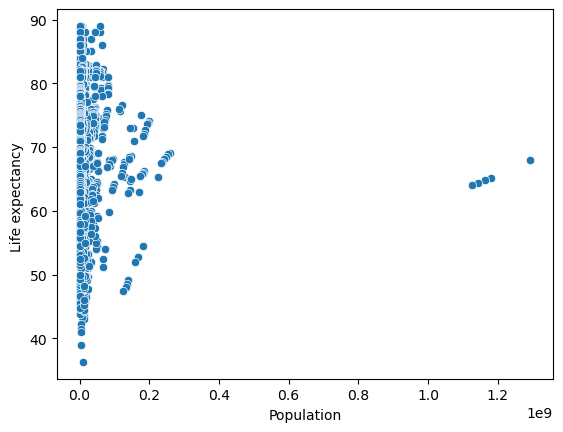

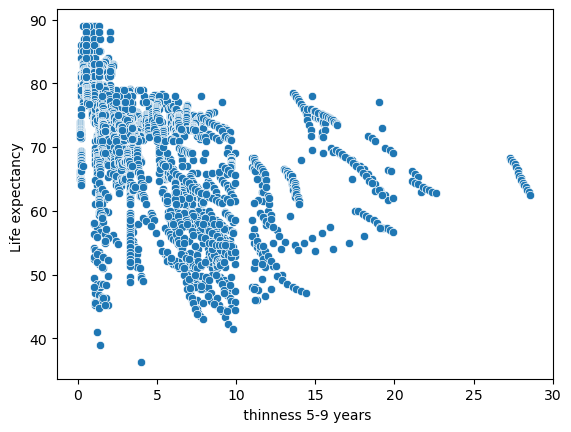

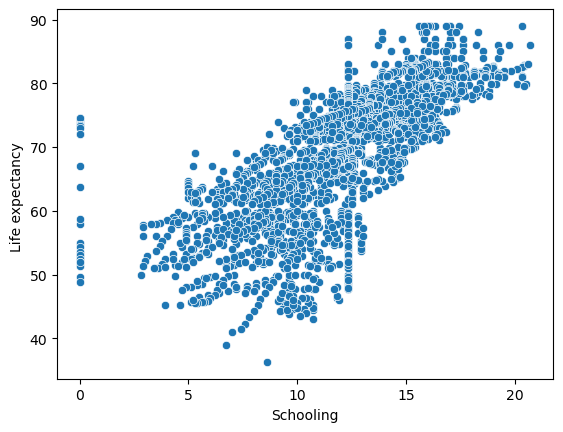

In [13]:
for i in ['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']:
    sns.scatterplot(data=data,x=i,y='Life expectancy ')
    plt.show()

In [45]:
#xử lý dữ liệu outliers 
#lấy mốc trên mốc dưới
def xac_dinh_moc(col):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR
    return low, up
for i in data.select_dtypes(include=['float64','int64']):
    low,up=xac_dinh_moc(data[i])
    data[i]=np.where(data[i]<low,low,data[i])
    data[i]=np.where(data[i]>up,up,data[i])

ValueError: num must be an integer with 1 <= num <= 16, not 17

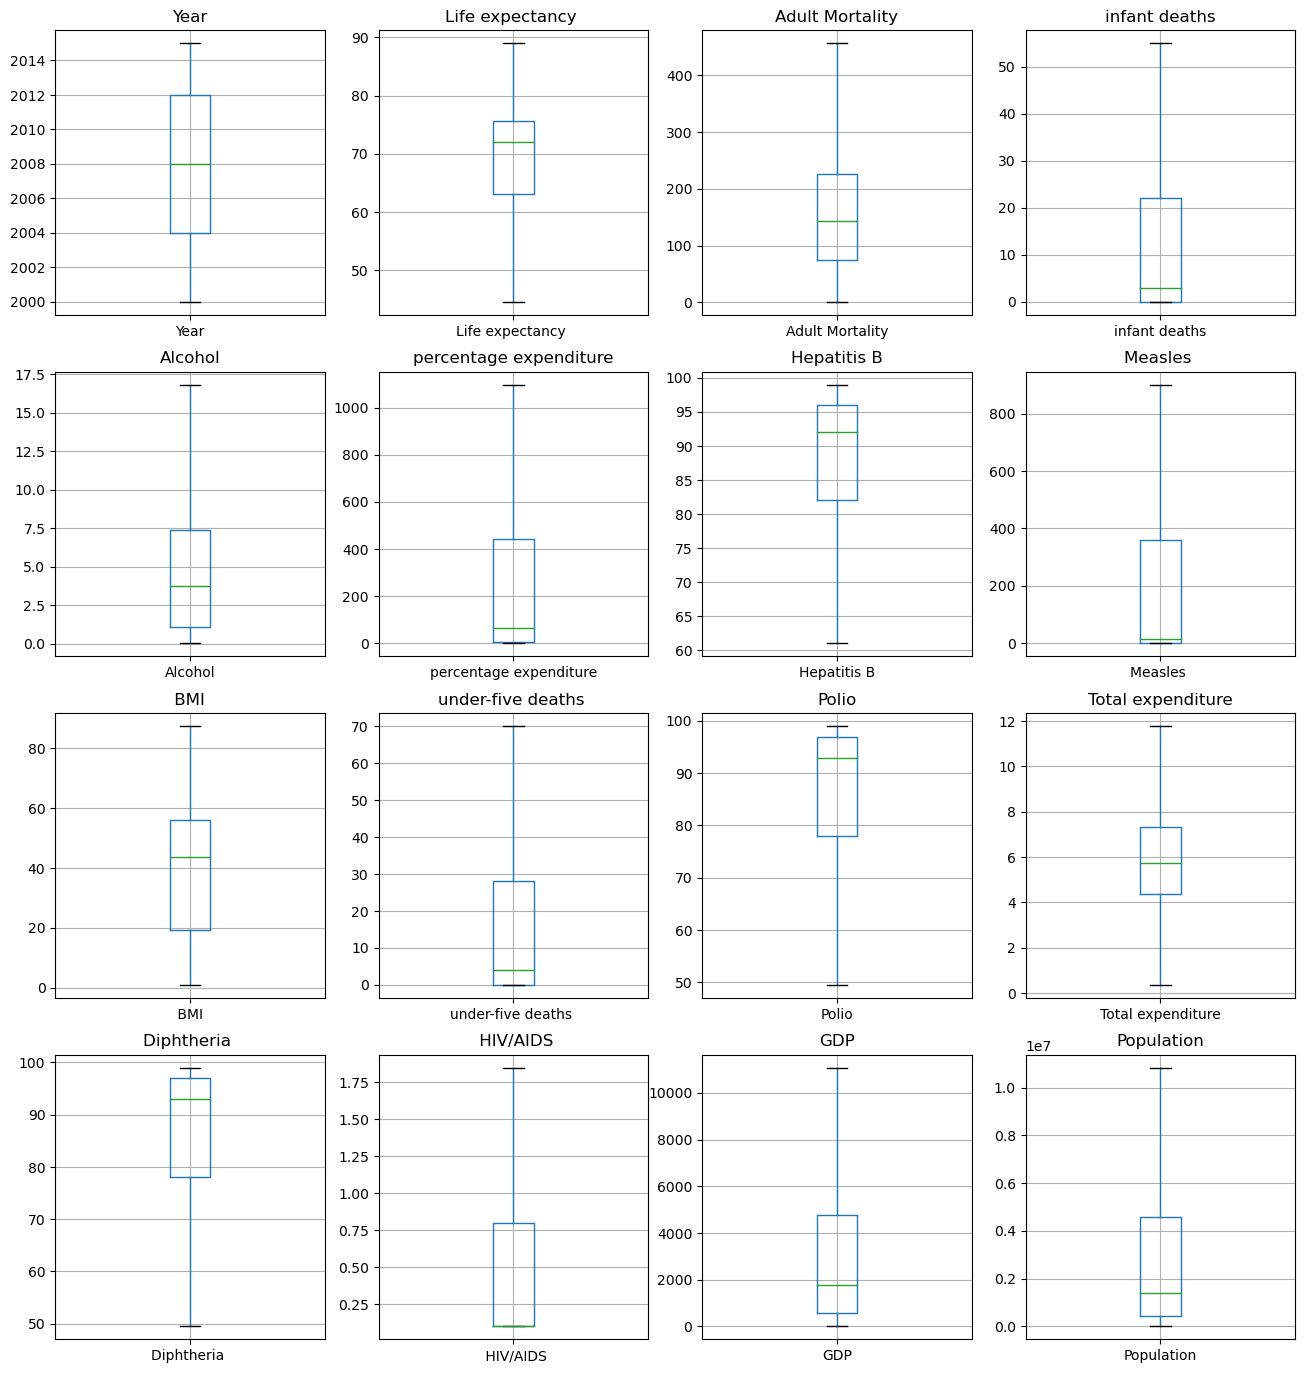

In [46]:
#boxplot sau khi giảm nhiễu
import matplotlib.pyplot as plt 

numerical_columns = data.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(16, 17))  

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  
    data.boxplot(col)
    plt.title(col)

plt.tight_layout()
plt.show()

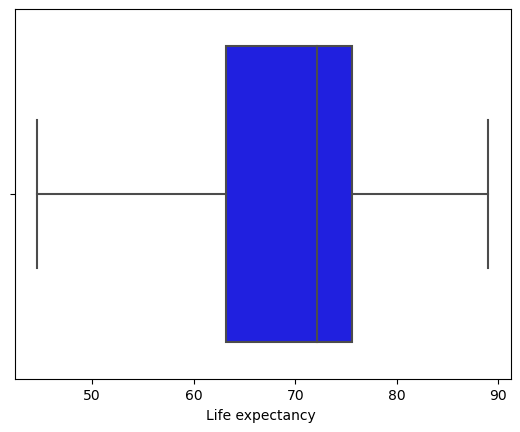

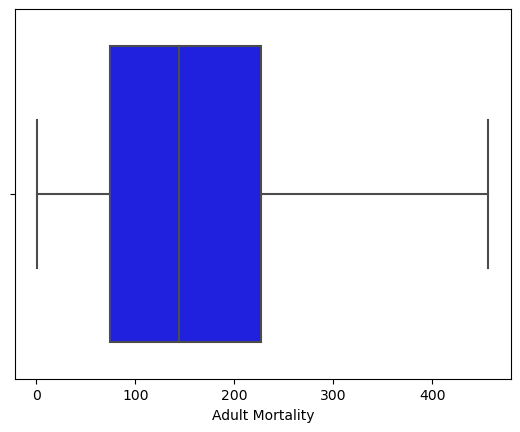

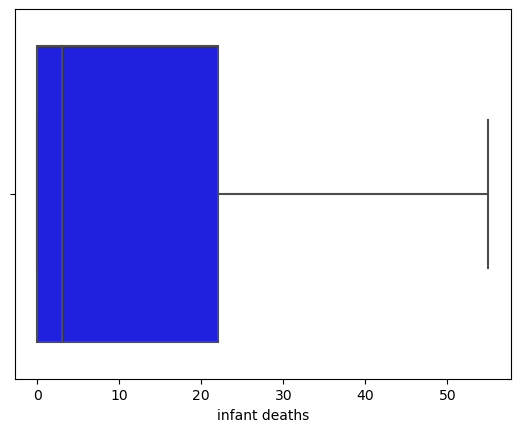

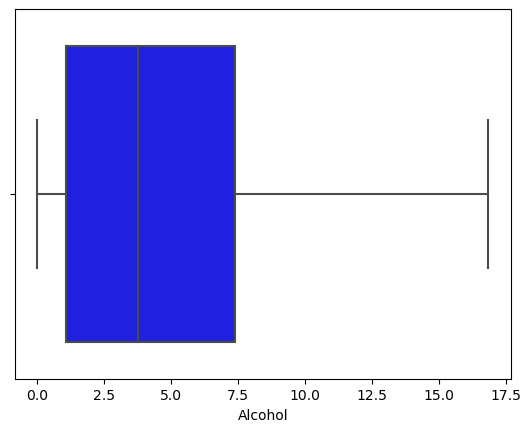

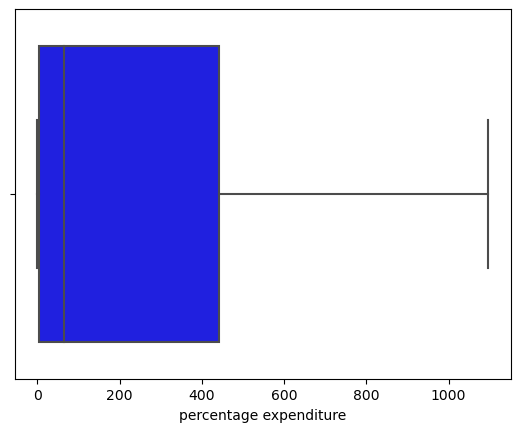

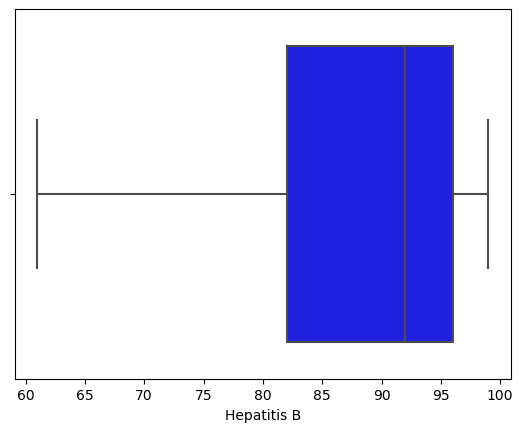

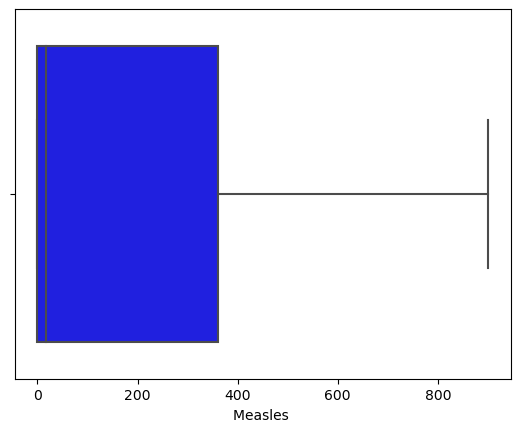

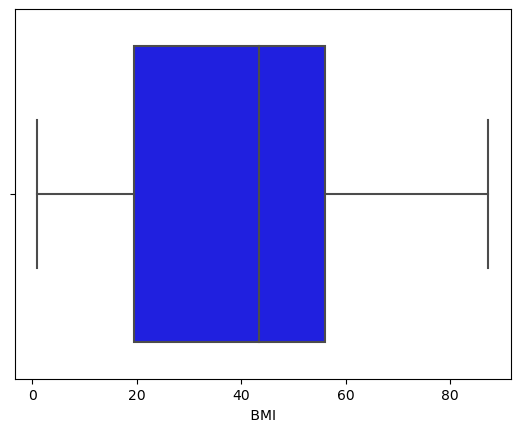

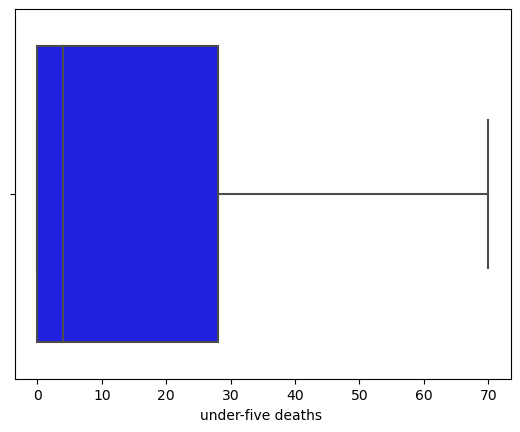

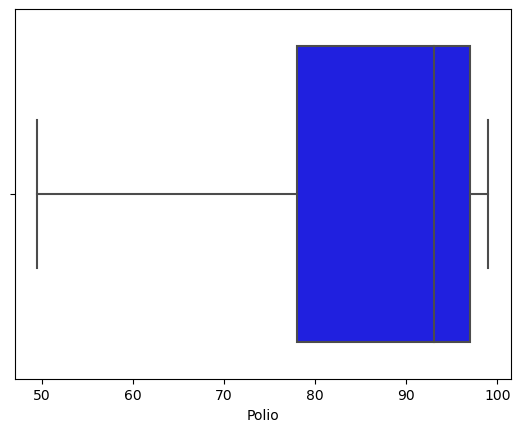

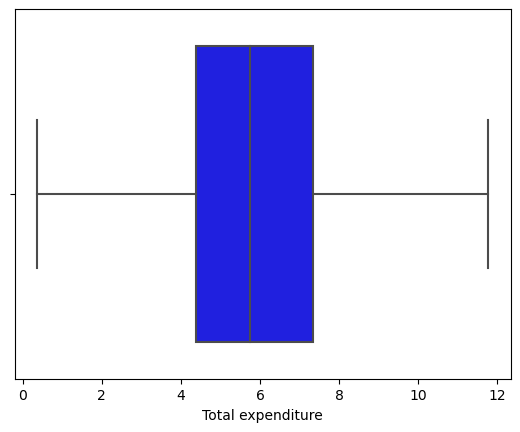

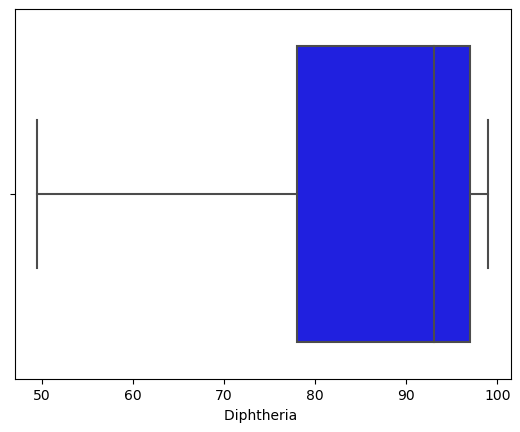

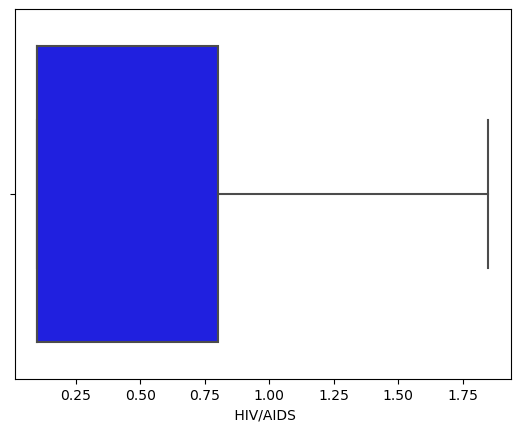

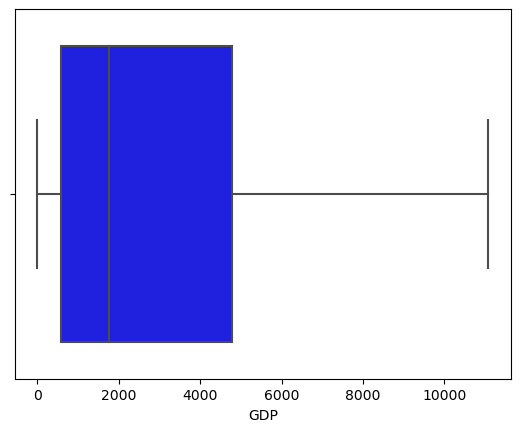

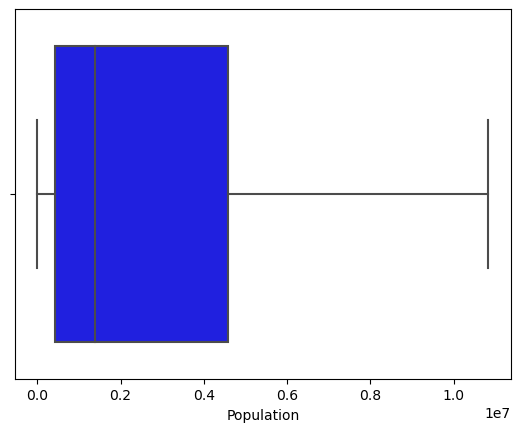

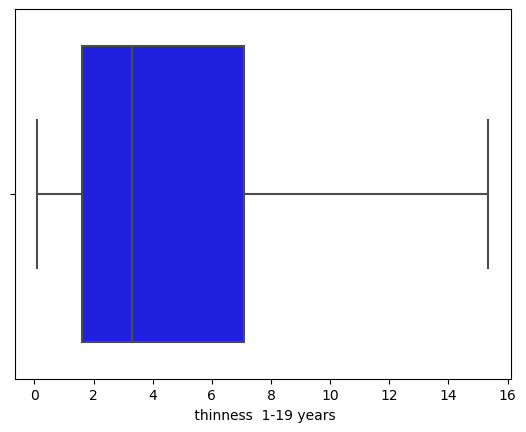

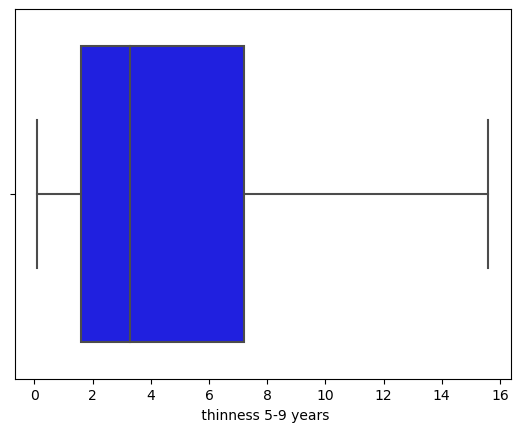

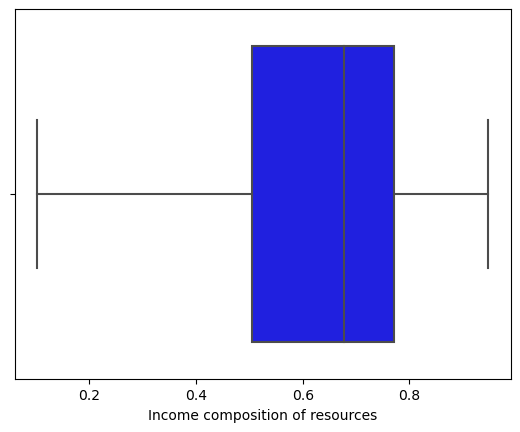

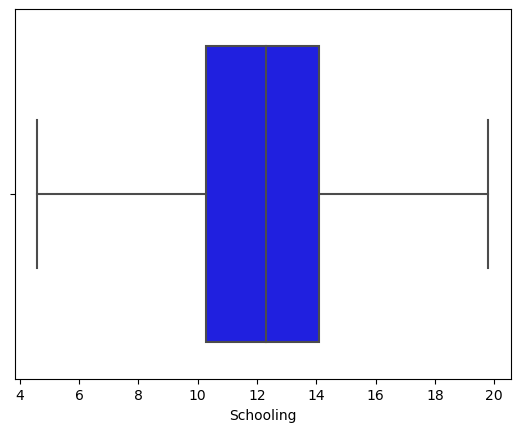

In [44]:
#kiểm tra lại outliers bằng boxplot
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data,x=i,color="blue")
    plt.show()

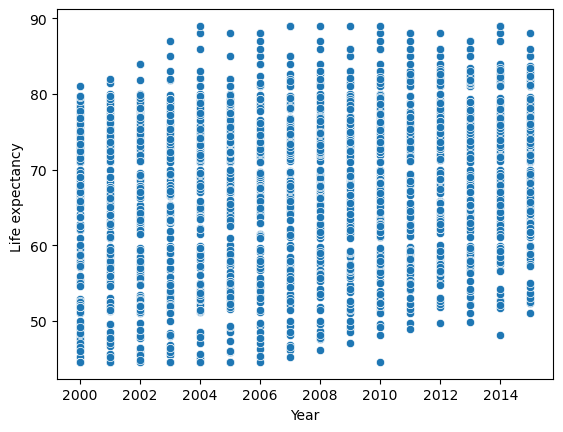

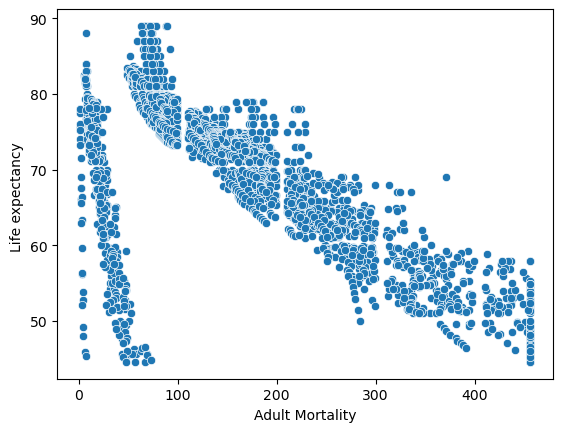

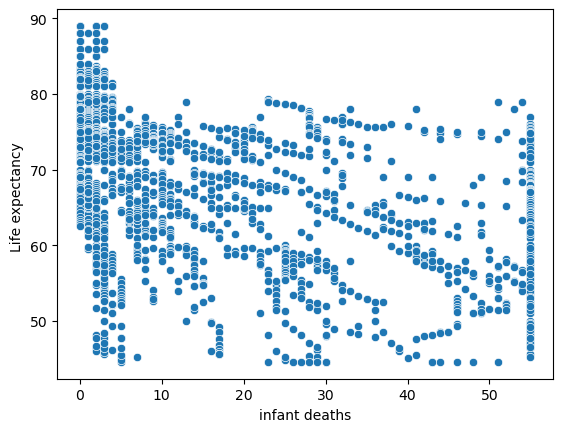

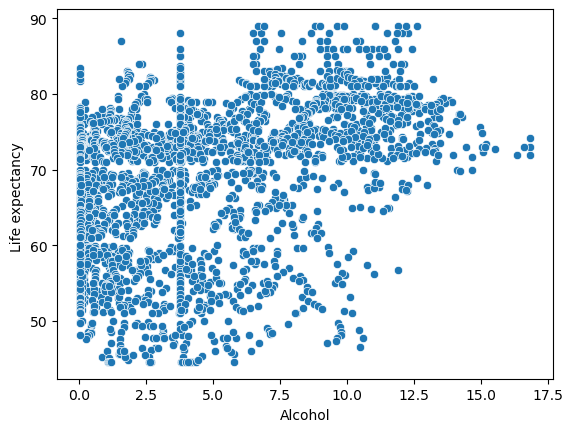

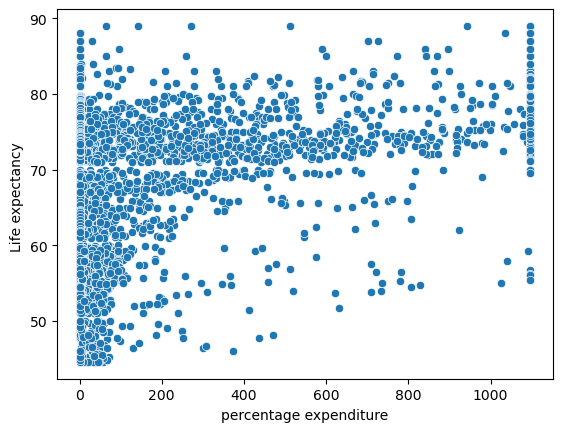

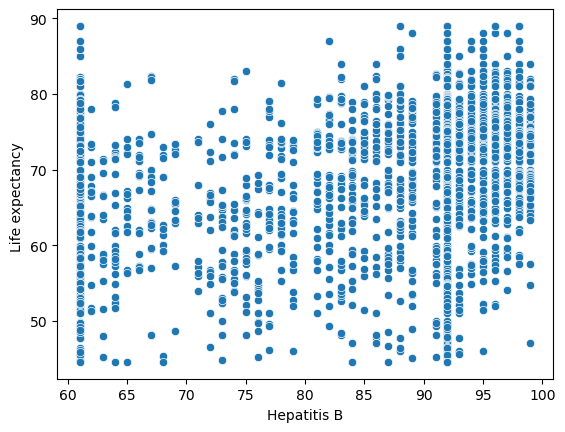

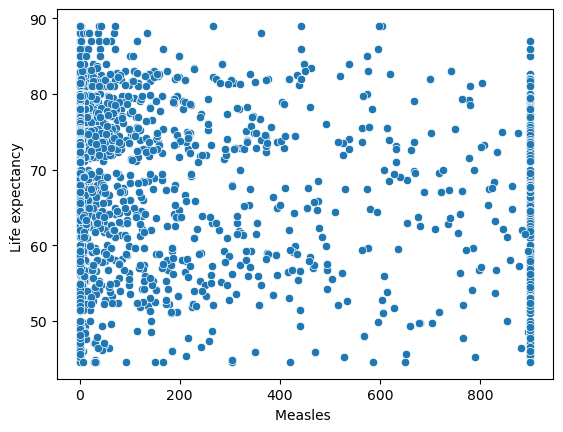

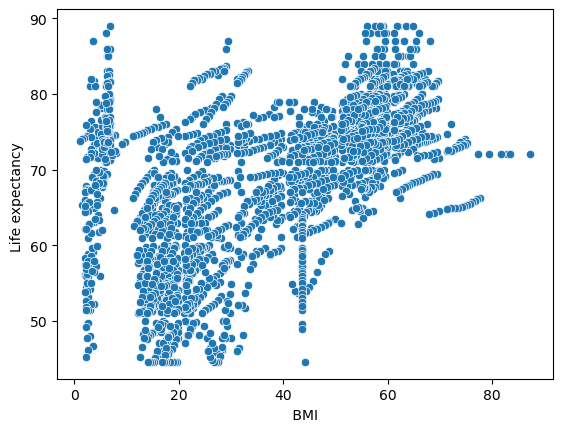

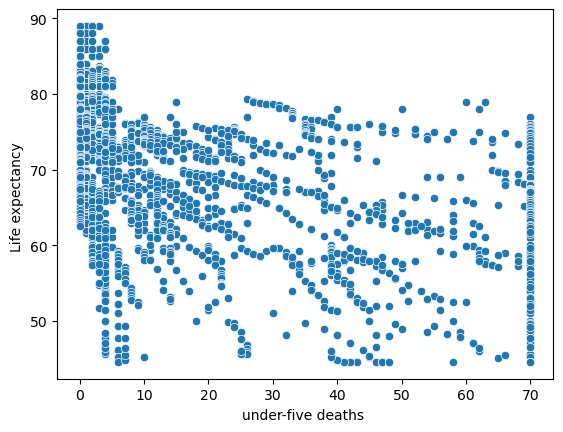

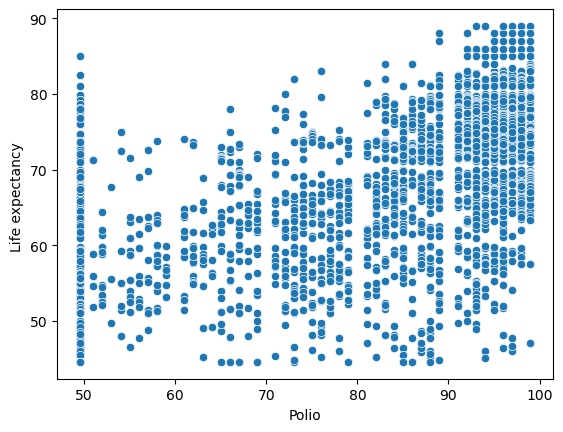

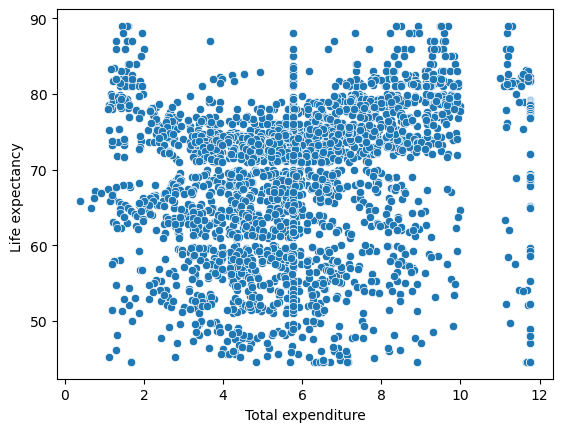

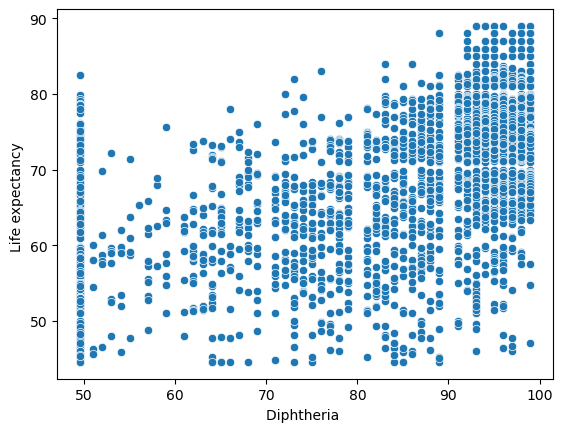

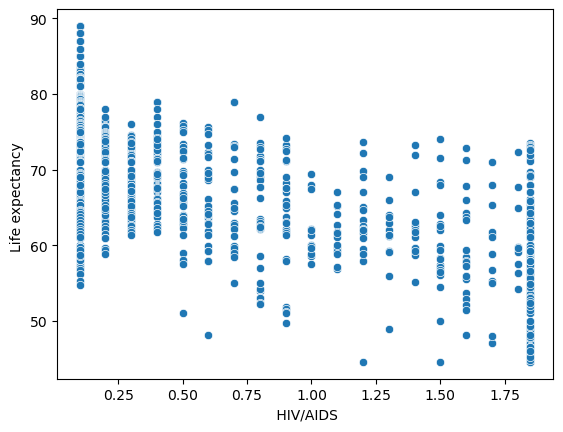

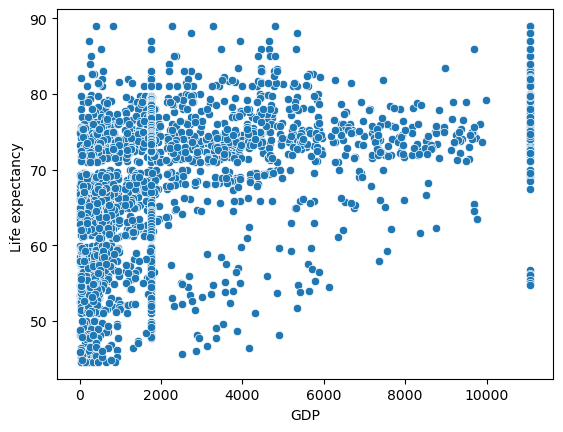

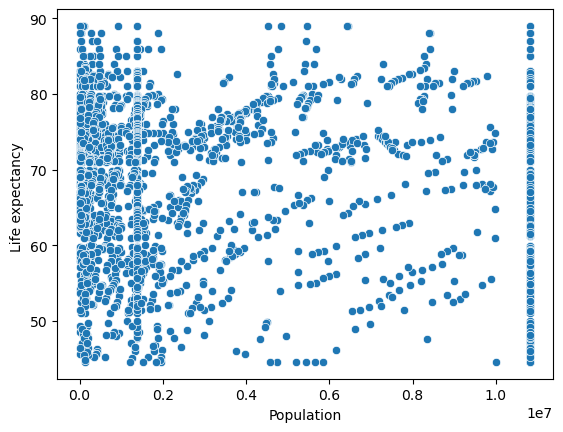

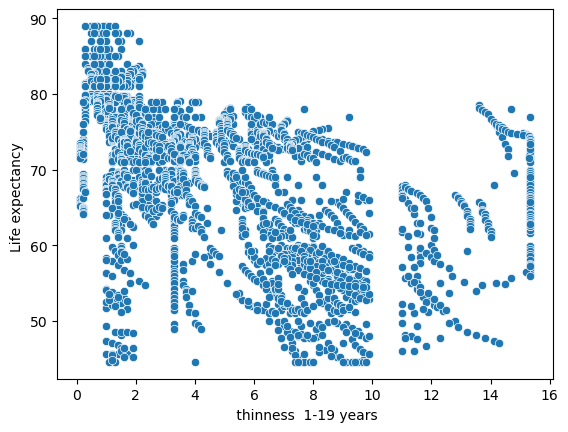

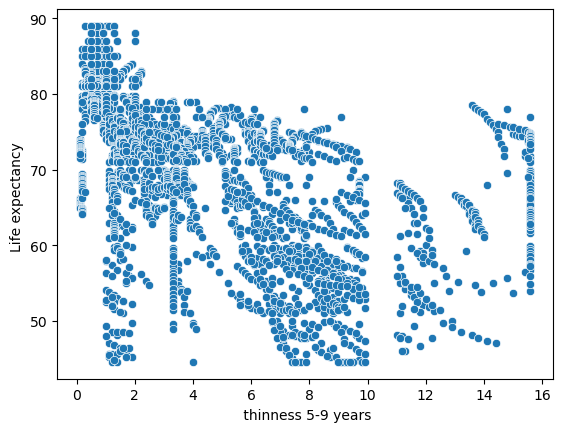

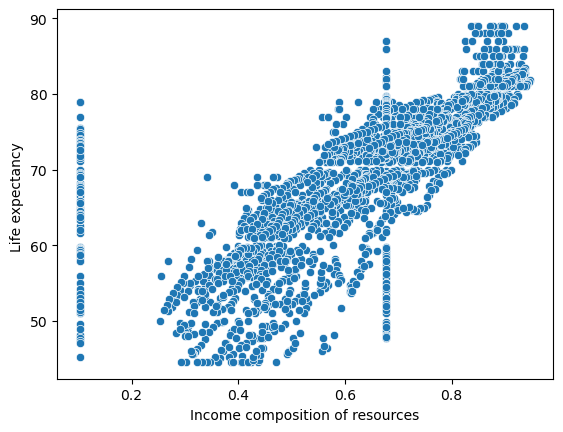

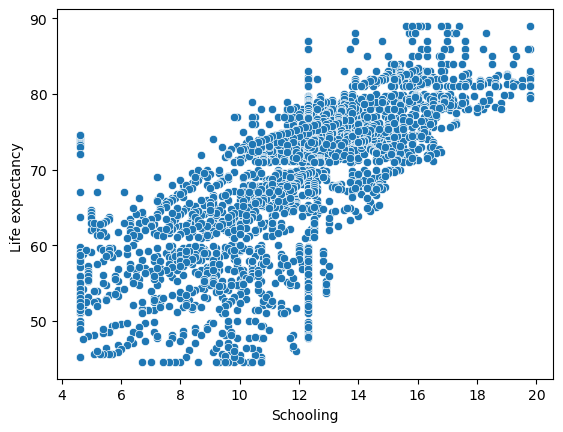

In [17]:
for i in ['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']:
    sns.scatterplot(data=data,x=i,y='Life expectancy ')
    plt.show()

In [55]:
#encoding of data (mã hóa cái nhãn của các dữ liệu phân loại)
pd.get_dummies(data=data,columns=["Country","Status"],drop_first=True)


Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015.0              65.0            263.0           55.0     0.01   
1     2014.0              59.9            271.0           55.0     0.01   
2     2013.0              59.9            268.0           55.0     0.01   
3     2012.0              59.5            272.0           55.0     0.01   
4     2011.0              59.2            275.0           55.0     0.01   
...      ...               ...              ...            ...      ...   
2933  2004.0              44.6            456.5           27.0     4.36   
2934  2003.0              44.6            456.5           26.0     4.06   
2935  2002.0              44.8             73.0           25.0     4.43   
2936  2001.0              45.3            456.5           25.0     1.72   
2937  2000.0              46.0            456.5           24.0     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624    65.000000   900.625   19.1   
1                  73.523582    62.000000   492.000   18.6   
2                  73.219243    64.000000   430.000   18.1   
3                  78.184215    67.000000   900.625   17.6   
4                   7.097109    68.000000   900.625   17.2   
...                      ...          ...       ...    ...   
2933                0.000000    68.000000    31.000   27.1   
2934                0.000000    58.351153   900.625   26.7   
2935                0.000000    73.000000   304.000   26.3   
2936                0.000000    76.000000   529.000   25.9   
2937                0.000000    79.000000   900.625   25.5   

      under-five deaths   ...  Country_United States of America  \
0                   70.0  ...                             False   
1                   70.0  ...                             False   
2                   70.0  ...                             False   
3                   70.0  ...                             False   
4                   70.0  ...                             False   
...                  ...  ...                               ...   
2933                42.0  ...                             False   
2934                41.0  ...                             False   
2935                40.0  ...                             False   
2936                39.0  ...                             False   
2937                39.0  ...                             False   

      Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  \
0               False               False            False   
1               False               False            False   
2               False               False            False   
3               False               False            False   
4               False               False            False   
...               ...                 ...              ...   
2933            False               False            False   
2934            False               False            False   
2935            False               False            False   
2936            False               False            False   
2937            False               False            False   

      Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
0                                          False             False   
1                                          False             False   
2                                          False             False   
3                                          False             False   
4                                          False             False   
...                                          ...               ...   
2933                                       False             False   
2934                                       False             False   
2935                                       False             False   
2936                                       False             False   
2937                                      

In [18]:
#normalization (đoạn ni hỏi lại thầy xem dữ liệu mình cần ko.)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
numerical_cols= data.select_dtypes(include='number').columns.drop('Year')
data_numerical=data[numerical_cols]
scaled_data=scaler.fit_transform(data_numerical)
data_scaled=pd.DataFrame(scaled_data, columns=numerical_cols)
data_scaled['Year']=data['Year']
data_scaled.head()


Life expectancy   Adult Mortality  infant deaths   Alcohol  \
0         -0.447767         0.875099       2.165057 -1.157385   
1         -0.985771         0.944382       2.165057 -1.157385   
2         -0.985771         0.918400       2.165057 -1.157385   
3         -1.027968         0.953042       2.165057 -1.157385   
4         -1.059615         0.979023       2.165057 -1.157385   

   percentage expenditure  Hepatitis B  Measles       BMI   \
0               -0.546410    -1.788340  1.886225 -0.967349   
1               -0.540647    -2.032107  0.730456 -0.992434   
2               -0.541429    -1.869596  0.555093 -1.017519   
3               -0.528678    -1.625829  1.886225 -1.042605   
4               -0.711239    -1.544574  1.886225 -1.062673   

   under-five deaths      Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0            2.065644 -2.268402           0.991344    -1.285904  -0.629209   
1            2.065644 -1.730664           1.000080    -1.475921  -0.629209   
2            2.065644 -1.477611           0.978240    -1.349243  -0.629209   
3            2.065644 -1.161295           1.148594    -1.159226  -0.629209   
4            2.065644 -1.098031           0.864671    -1.095887  -0.629209   

        GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0 -0.756835    1.996219               2.711459             2.740246   
1 -0.749306   -0.741659               2.711459             2.740246   
2 -0.744263    1.996219               2.711459             2.740246   
3 -0.734146    0.136491               2.711459             2.740246   
4 -0.894692   -0.050733               2.711459             2.740246   

   Income composition of resources  Schooling    Year  
0                        -0.812827  -0.632374  2015.0  
1                        -0.828468  -0.664624  2014.0  
2                        -0.859750  -0.696875  2013.0  
3                        -0.896245  -0.729125  2012.0  
4                        -0.943168  -0.825876  2011.0

In [75]:
import pandas as pd

# Xác định giá trị tối thiểu và tối đa của cột "Life expectancy"
tuoi_thap_nhat = data['Life expectancy '].min()
tuoi_cao_nhat = data['Life expectancy '].max()

# Xác định các biến khác
tuoi_trung_binh = data['Life expectancy '].mean()
do_lech_chuan = data['Life expectancy '].std()

# Xác định các cạnh của khoảng cho phân loại
canh_khoang = [
    tuoi_thap_nhat,
    tuoi_trung_binh - do_lech_chuan,
    tuoi_trung_binh,
    tuoi_trung_binh + do_lech_chuan,
    tuoi_cao_nhat
]

# Gán nhãn cho các khoảng phân loại
label_khoang = ["Thấp", "Dưới_trung_bình", "Trung_bình", "Trên_trung_bình"]

# Sử dụng hàm cut để tạo danh mục dựa trên khoảng
data["Life_expectancy_phan_loai"] = pd.cut(
    data["Life expectancy "],
    bins=canh_khoang,
    labels=label_khoang,
    include_lowest=True
)

# Hiển thị phân phối của các cột đã phân loại theo khoảng đã chia
phan_phoi = data["Life_expectancy_phan_loai"].value_counts()

# Hiển thị danh sách dữ liệu được cập nhật
du_lieu_duoc_cap_nhat = data[["Life expectancy ", "Life_expectancy_phan_loai"]].head()
print(phan_phoi,
      du_lieu_duoc_cap_nhat)

Life_expectancy_phan_loai
Trung_bình         1296
Dưới_trung_bình     667
Thấp                575
Trên_trung_bình     400
Name: count, dtype: int64    Life expectancy  Life_expectancy_phan_loai
0              65.0           Dưới_trung_bình
1              59.9           Dưới_trung_bình
2              59.9           Dưới_trung_bình
3              59.5                      Thấp
4              59.2                      Thấp


In [82]:
data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')